# 5.1 - Logistic Regression with a Single Predictor

In [1]:
import pystan

In [2]:
import statsmodels.formula.api as smf

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)

In [25]:
%matplotlib inline

## Loading and Cleaning the Data

In [26]:
presvote_all = pd.read_csv("../ARM_Data/nes/nes5200_processed_voters_realideo.csv", index_col = 0, low_memory=False)

In [6]:
presvote_all.columns

Index(['year', 'resid', 'weight1', 'weight2', 'weight3', 'age', 'gender',
       'race', 'educ1', 'urban', 'region', 'income', 'occup1', 'union',
       'religion', 'educ2', 'educ3', 'martial_status', 'occup2', 'icpsr_cty',
       'fips_cty', 'partyid7', 'partyid3', 'partyid3_b', 'str_partyid',
       'father_party', 'mother_party', 'dlikes', 'rlikes', 'dem_therm',
       'rep_therm', 'regis', 'vote', 'regisvote', 'presvote',
       'presvote_2party', 'presvote_intent', 'ideo_feel', 'ideo7', 'ideo',
       'cd', 'state', 'inter_pre', 'inter_post', 'black', 'female', 'age_sq',
       'rep_presvote', 'rep_pres_intent', 'south', 'real_ideo', 'presapprov',
       'perfin1', 'perfin2', 'perfin', 'presadm', 'age_10', 'age_sq_10',
       'newfathe', 'newmoth', 'parent_party', 'white'],
      dtype='object')

In [7]:
income_levels = presvote_all.income.unique()
presvote_parties = presvote_all.presvote.unique()

In [8]:
def get_index(string):
    if type(string) is float:
        assert string is np.nan
        return np.nan
    split_string = string.split(". ")
    index = split_string[0]
    return index

def get_string_identifer(string):
    if type(string) is float:
        assert string is np.nan
        return np.nan
    split_string = string.split(". ")
    string_identifier = split_string[1]
    return string_identifier

def make_map_dictionary(strings):
    keys = [get_index(string) for string in strings]
    values = [get_string_identifer(string) for string in strings]
    
    map_dictionary = dict(zip(keys, values))
    
    return map_dictionary

In [32]:
income_dictionary = make_map_dictionary(income_levels)
presvote_dictionary = make_map_dictionary(presvote_parties)

sorted_income_identifier_strings = sorted(get_string_identifer(income_string) for income_string in income_levels
                                         if income_string is not np.nan)

In [10]:
presvote_select = pd.DataFrame()

In [11]:
presvote_select["income_index"] = presvote_all.income.apply(get_index)

# presvote_select["income_class"] = presvote_all.income.apply(get_income_class) #alternative method
presvote_select["income_class"] = presvote_select.income_index.map(income_dictionary)

In [12]:
presvote_select["presvote_index"] = presvote_all.presvote.apply(get_index)
presvote_select["presvote_party"] = presvote_select.presvote_index.map(presvote_dictionary)

In [15]:
presvote_select = presvote_select.dropna()

In [51]:
presvote_select = presvote_select[~presvote_select.presvote_party.str.contains("third party")]

In [65]:
presvote_select.income_index = presvote_select.income_index.astype(int)
presvote_select.presvote_index = presvote_select.presvote_index.astype(int) -1

In [66]:
presvote_select.sample(10)

,income_index,income_class,presvote_index,presvote_party
36907,1,0 to 16 percentile,0,democrat
32109,4,68 to 95 percentile,1,republican
3821,4,68 to 95 percentile,1,republican
18718,1,0 to 16 percentile,0,democrat
723,4,68 to 95 percentile,0,democrat
18441,4,68 to 95 percentile,0,democrat
3585,3,34 to 67 percentile,1,republican
1626,4,68 to 95 percentile,0,democrat
664,4,68 to 95 percentile,0,democrat
25746,3,34 to 67 percentile,1,republican


## Visualizing the Data

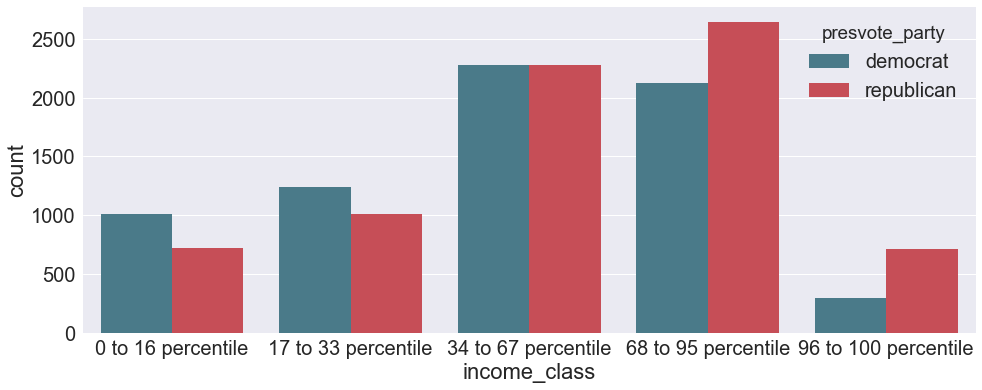

In [67]:
plt.figure(figsize=(16,6))

with sns.color_palette(sns.diverging_palette(220, 10, sep=80, n=2)):
    sns.countplot("income_class", hue="presvote_party", data=presvote_select,
              order = sorted_income_identifier_strings,);

## Running Logistic Regression with `statsmodels`

In [68]:
presvote_income_logit = smf.logit("presvote_index ~ income_index", data = presvote_select)

In [70]:
results = presvote_income_logit.fit()

Optimization terminated successfully.
         Current function value: 0.683838
         Iterations 4


In [74]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   4.0000    
Dependent Variable: presvote_index   Pseudo R-squared: 0.013     
Date:               2018-03-04 22:21 AIC:              19560.4016
No. Observations:   14299            BIC:              19575.5375
Df Model:           1                Log-Likelihood:   -9778.2   
Df Residuals:       14297            LL-Null:          -9905.0   
Converged:          1.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -0.6795   0.0498 -13.6382 0.0000 -0.7771 -0.5818
income_index      0.2406   0.0153  15.7666 0.0000  0.2107  0.2705
=================================================================

"""